# **Entrega 2**

Importamos los paquetes necesarios

In [1]:
import numpy as np
import pandas as pd
import statsmodels as st
import matplotlib.pyplot as plt
import statsmodels.api as sm           
import statsmodels.formula.api as smf  
import scipy as stast
import sklearn as skl         
import seaborn as sns

Importamos los datasets

In [3]:
datosContactos = pd.read_csv("DatasetContactos.csv")
datosTransacciones = pd.read_csv("DatasetTrxs.csv")

## **Parte 1: EDA**

Exploracion los datasets

In [4]:
datosContactos.head()

,CUST_ID;PHONE;CONTACTS
0,C10001;+1 314-407-7397;2
1,C10002;+1 203-790-2151;2
2,C10003;+1 225-959-8209;3
3,C10004;+1 315-394-6219;0
4,C10005;+1 207-523-0823;0


In [5]:
datosTransacciones.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
datosContactos.describe()

,CUST_ID;PHONE;CONTACTS
count,8950
unique,8950
top,C10001;+1 314-407-7397;2
freq,1


In [7]:
datosTransacciones.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Las variables con las que trabajaremos en los distintos dataset seran:

Dataset Transacciones Clientes

*   CUSTID: Identificador del cliente
*   BALANCE: Monto del saldo disponible para realizar compras
*   BALANCE_FREQUENCY: Frecuencia de actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
*   PURCHASES: Importe de las compras realizadas
*   ONE_OFF_PURCHASES: Monto máximo de una compra realizada de una sola vez
*   INSTALLMENTS_PURCHASES: Cantidad de compras hechas en cuotas
*   CASH_ADVANCE: Cantidad de retiros en efectivo
*   PURCHASES_FREQUENCY: Frecuencia de las compras (1 = frecuentemente, 0 = no frecuentemente)
*   ONE_OFF_PURCHASES_FREQUENCY: Compras frecuentes son realizadas deuna sola vez (1 = frecuentemente, 0 = no frecuentemente)
*   PURCHASES_INSTALLMENTS_FREQUENCY: Frecuencia de compras en cuotas (1 = frecuentemente, 0 = no frecuentemente) 
*   CASH_ADVANCE_FREQUENCY: Frecuencia de retiros en efectivo (1 = frecuentemente, 0 = no frecuentemente)
*   CASH_ADVANCE_TRX: Cantidad de transacciones de retiro en efectivo
*   PURCHASES_TRX: Cantidad de transacciones
*   CREDIT_LIMIT: Limite de crédito
*   PAYMENTS: Cantidad de pagos efectuados por el usuario
*   MINIMUM_PAYMENTS: Cantidad de pagos mínimos hechos por el usuario
*   PRC_FULL_PAYMENT: Porcentaje de pagos totales hechos por el usuario
*   TENURE: Tenencia de la tarjeta de crédito (meses)

Dataset Contactos

*   CUSTID: Identificador del cliente
*   PHONE: Teléfono de contacto
*   CONTACTS: Cantidad de llamados que recibió en los últimos 60 días





Estudiamos la distribucion de las variables del dataset Transacciones


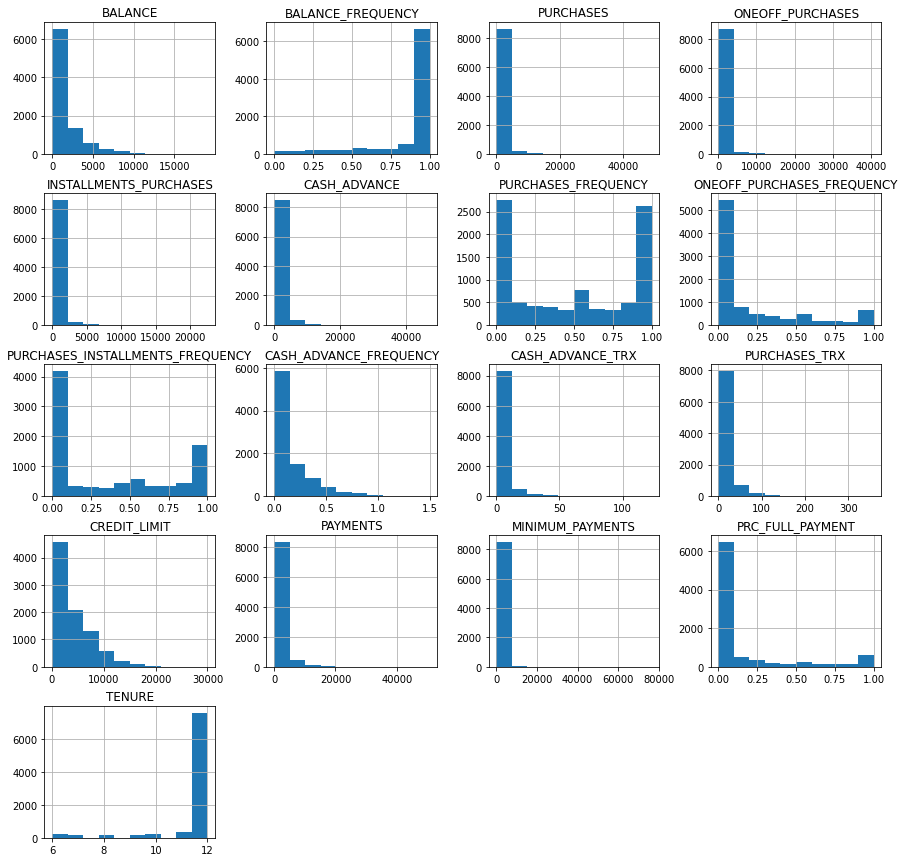

In [8]:
datosTransacciones.hist(figsize = (15,15));

Estudiamos los valores maximos y minimos de cada variable

In [9]:
(min(datosTransacciones['BALANCE']), max(datosTransacciones['BALANCE']))

(0.0, 19043.13856)

In [10]:
(min(datosTransacciones['BALANCE_FREQUENCY']), max(datosTransacciones['BALANCE_FREQUENCY']))

(0.0, 1.0)

In [11]:
(min(datosTransacciones['PURCHASES']), max(datosTransacciones['PURCHASES']))

(0.0, 49039.57)

In [12]:
(min(datosTransacciones['ONEOFF_PURCHASES']), max(datosTransacciones['ONEOFF_PURCHASES']))

(0.0, 40761.25)

In [13]:
(min(datosTransacciones['INSTALLMENTS_PURCHASES']), max(datosTransacciones['INSTALLMENTS_PURCHASES']))

(0.0, 22500.0)

In [14]:
(min(datosTransacciones['CASH_ADVANCE']), max(datosTransacciones['CASH_ADVANCE']))

(0.0, 47137.21176)

In [15]:
(min(datosTransacciones['PURCHASES_FREQUENCY']), max(datosTransacciones['PURCHASES_FREQUENCY']))

(0.0, 1.0)

In [16]:
(min(datosTransacciones['ONEOFF_PURCHASES_FREQUENCY']), max(datosTransacciones['ONEOFF_PURCHASES_FREQUENCY']))

(0.0, 1.0)

In [17]:
(min(datosTransacciones['PURCHASES_INSTALLMENTS_FREQUENCY']), max(datosTransacciones['PURCHASES_INSTALLMENTS_FREQUENCY']))

(0.0, 1.0)

In [18]:
(min(datosTransacciones['CASH_ADVANCE_FREQUENCY']), max(datosTransacciones['CASH_ADVANCE_FREQUENCY']))

(0.0, 1.5)

In [19]:
(min(datosTransacciones['CASH_ADVANCE_TRX']), max(datosTransacciones['CASH_ADVANCE_TRX']))

(0, 123)

In [20]:
(min(datosTransacciones['PURCHASES_TRX']), max(datosTransacciones['PURCHASES_TRX']))

(0, 358)

In [21]:
(min(datosTransacciones['CREDIT_LIMIT']), max(datosTransacciones['CREDIT_LIMIT']))

(50.0, 30000.0)

In [22]:
(min(datosTransacciones['PAYMENTS']), max(datosTransacciones['PAYMENTS']))

(0.0, 50721.48336)

In [23]:
(min(datosTransacciones['MINIMUM_PAYMENTS']), max(datosTransacciones['MINIMUM_PAYMENTS']))

(0.019163, 76406.20752)

In [24]:
(min(datosTransacciones['PRC_FULL_PAYMENT']), max(datosTransacciones['PRC_FULL_PAYMENT']))

(0.0, 1.0)

In [25]:
(min(datosTransacciones['TENURE']), max(datosTransacciones['TENURE']))

(6, 12)

Estudiamos la media y el promedio de las variables

In [26]:
datosTransacciones["BALANCE"].mean()

1564.4748276781006

In [27]:
datosTransacciones["BALANCE_FREQUENCY"].mean()

0.8772707255865921

In [28]:
datosTransacciones["ONEOFF_PURCHASES"].mean()

592.4373709497207

In [29]:
datosTransacciones["INSTALLMENTS_PURCHASES"].mean()

411.0676446927374

In [30]:
datosTransacciones["CASH_ADVANCE"].mean()

978.8711124654749

In [31]:
datosTransacciones["PURCHASES_FREQUENCY"].mean()

0.49035054837988823

In [32]:
datosTransacciones["ONEOFF_PURCHASES_FREQUENCY"].mean()

0.202457683575419

In [33]:
datosTransacciones["PURCHASES_INSTALLMENTS_FREQUENCY"].mean()

0.3644373415642458

In [34]:
datosTransacciones["CASH_ADVANCE_FREQUENCY"].mean()

0.13514420033519556

In [35]:
datosTransacciones["CASH_ADVANCE_TRX"].mean()

3.2488268156424582

In [36]:
datosTransacciones["PURCHASES_TRX"].mean()

14.709832402234637

In [37]:
datosTransacciones["CREDIT_LIMIT"].mean()

4494.449450364621

In [38]:
datosTransacciones["PAYMENTS"].mean()

1733.1438520248046

In [39]:
datosTransacciones["MINIMUM_PAYMENTS"].mean()

864.2065423050828

In [40]:
datosTransacciones["PRC_FULL_PAYMENT"].mean()

0.15371464849162012

In [41]:
datosTransacciones["TENURE"].mean()

11.51731843575419

Vemos la distribucion de los datos

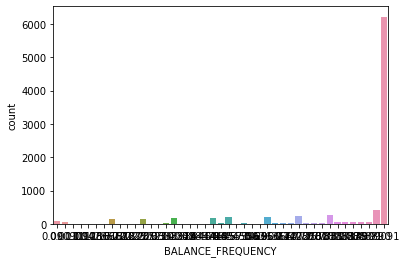

In [42]:
plt.figure()
sns.countplot(data = datosTransacciones, x="BALANCE_FREQUENCY")
display()

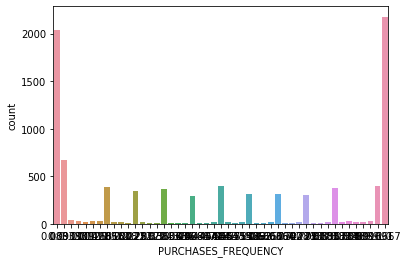

In [43]:
plt.figure()
sns.countplot(data = datosTransacciones, x="PURCHASES_FREQUENCY")
display()

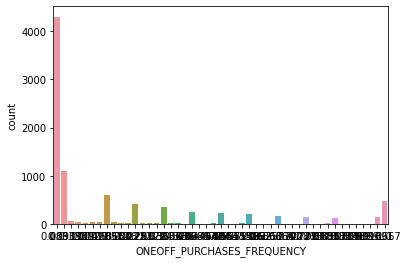

In [44]:
plt.figure()
sns.countplot(data = datosTransacciones, x="ONEOFF_PURCHASES_FREQUENCY")
display()

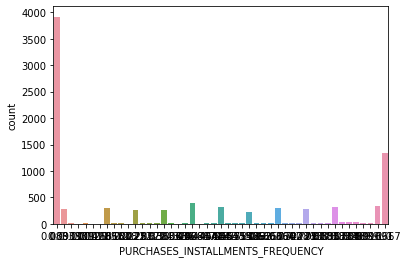

In [45]:
plt.figure()
sns.countplot(data = datosTransacciones, x="PURCHASES_INSTALLMENTS_FREQUENCY")
display()

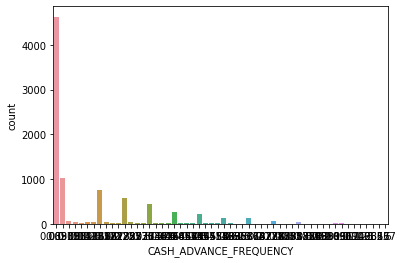

In [46]:
plt.figure()
sns.countplot(data = datosTransacciones, x="CASH_ADVANCE_FREQUENCY")
display()

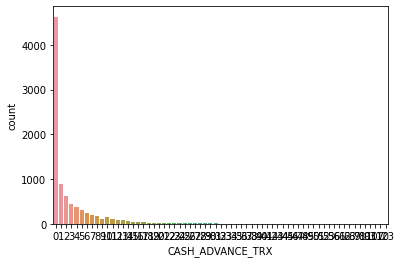

In [47]:
plt.figure()
sns.countplot(data = datosTransacciones, x="CASH_ADVANCE_TRX")
display()

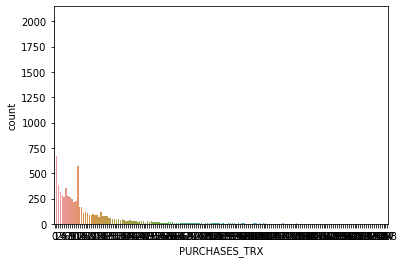

In [48]:
plt.figure()
sns.countplot(data = datosTransacciones, x="PURCHASES_TRX")
display()

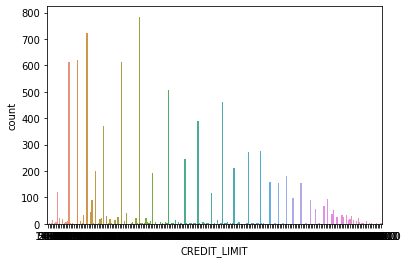

In [49]:
plt.figure()
sns.countplot(data = datosTransacciones, x="CREDIT_LIMIT")
display()

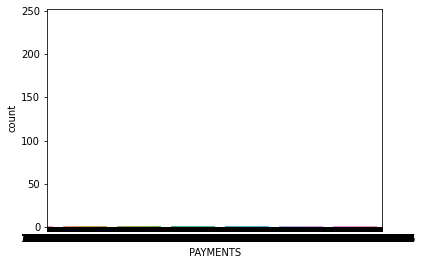

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="PAYMENTS")
display()

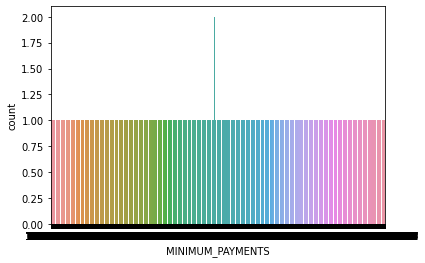

In [51]:
plt.figure()
sns.countplot(data = datosTransacciones, x="MINIMUM_PAYMENTS")
display()

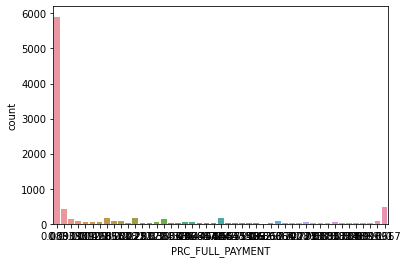

In [52]:
plt.figure()
sns.countplot(data = datosTransacciones, x="PRC_FULL_PAYMENT")
display()

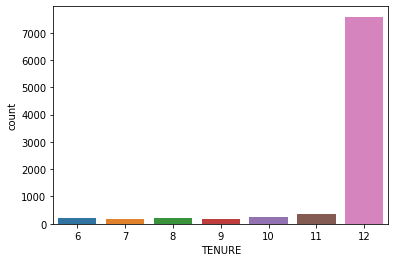

In [53]:
plt.figure()
sns.countplot(data = datosTransacciones, x="TENURE")
display()

Podemos ver el rango de la tenencia de la tarjeta con la que estamos trabajando, la cual va desde 6 a 12 meses, siendo la mayor parte de los datos de 12 meses

Box Plot de las variables:

Asi de esta forma podremos validar la inexistencia de outliers y observar mejor las distribuciones de las variables.

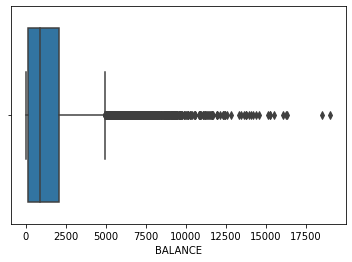

In [54]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['BALANCE'])
display()

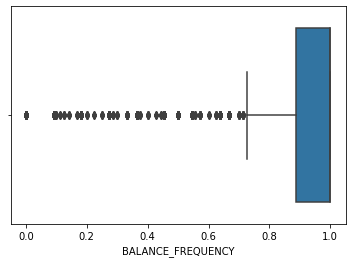

In [55]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['BALANCE_FREQUENCY'])
display()

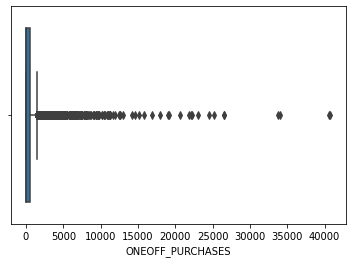

In [56]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['ONEOFF_PURCHASES'])
display()

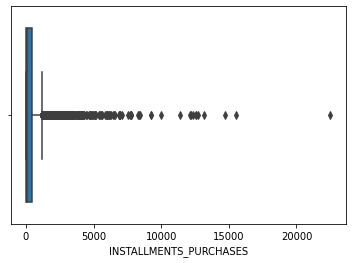

In [57]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['INSTALLMENTS_PURCHASES'])
display()

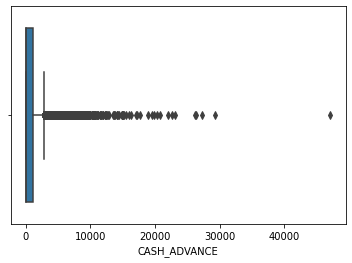

In [58]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['CASH_ADVANCE'])
display()

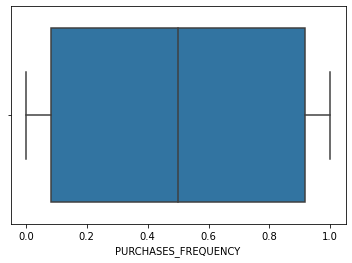

In [59]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['PURCHASES_FREQUENCY'])
display()

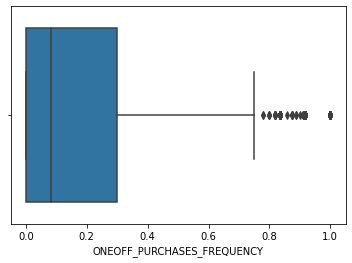

In [60]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['ONEOFF_PURCHASES_FREQUENCY'])
display()

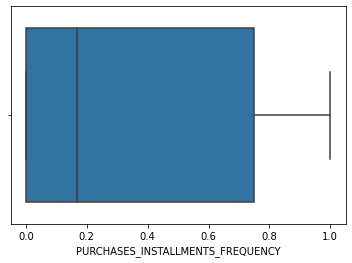

In [61]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['PURCHASES_INSTALLMENTS_FREQUENCY'])
display()

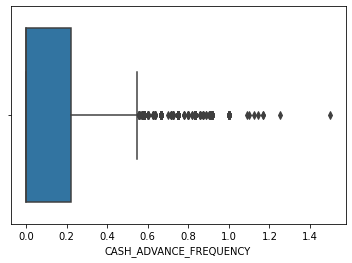

In [62]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['CASH_ADVANCE_FREQUENCY'])
display()

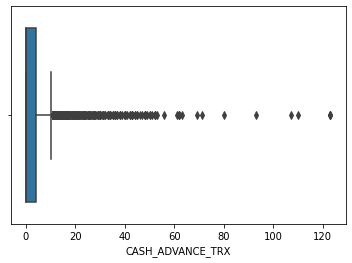

In [63]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['CASH_ADVANCE_TRX'])
display()

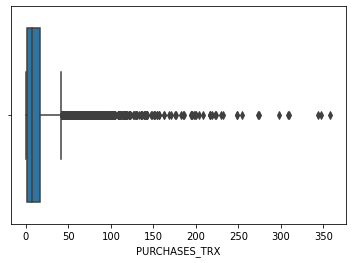

In [64]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['PURCHASES_TRX'])
display()

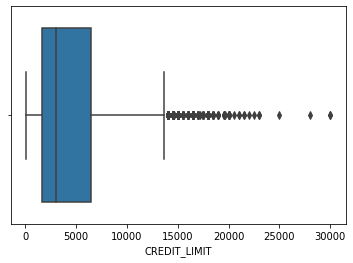

In [65]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['CREDIT_LIMIT'])
display()

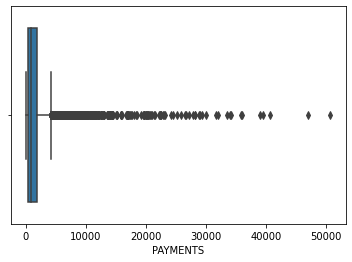

In [66]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['PAYMENTS'])
display()

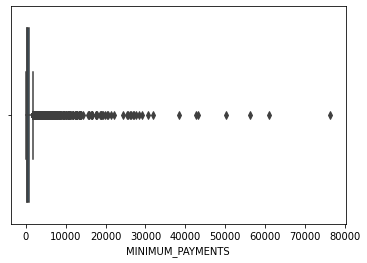

In [67]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['MINIMUM_PAYMENTS'])
display()

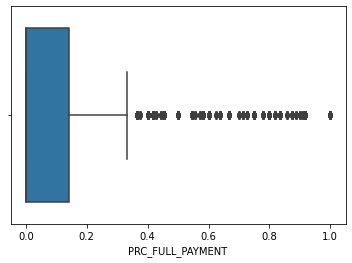

In [68]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['PRC_FULL_PAYMENT'])
display()

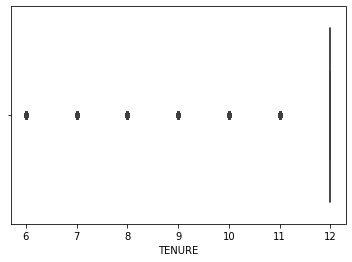

In [69]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['TENURE'])
display()

Representación gráfica de la correlación entre variables a traves de heatmap del paquete Seaborn

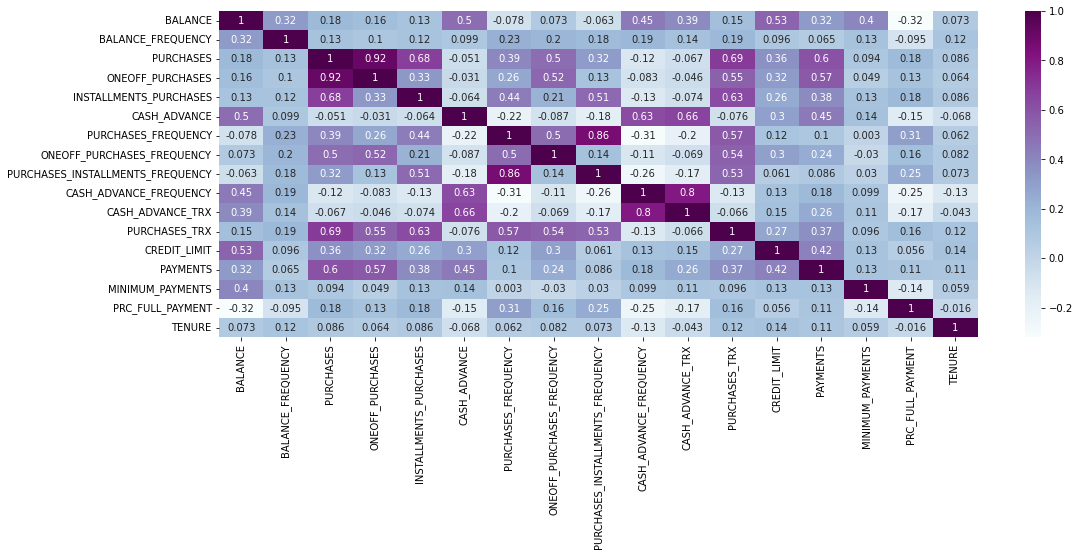

In [71]:
plt.figure(figsize = (17,6))
sns.heatmap(datosTransacciones.corr(), annot = True, cmap="BuPu")
plt.show()

# **Parte 2: Limpieza Datos**

Eliminamos los datos duplicados

In [72]:
datosContactos.drop_duplicates(inplace= True )

In [ ]:
datosTransacciones.drop_duplicates(inplace= True )

Veamos la cantidad de valores nulos

In [ ]:
print(datosTransacciones.isna().sum())

In [ ]:
print(datosContactos.isna().sum())

Hay un par de formas de manejar los valores nulos:

Eliminar filas con valores perdidos
Imputar valores perdidos
Apliquemos el último porque si eliminamos las filas con valores perdidos, podemos causar insuficiencia en los datos, lo que a su vez da como resultado un entrenamiento ineficiente del modelo.

Ahora, hay varias formas de realizar la imputación:

Un valor constante que tiene significado dentro del dominio, como 0, distinto de todos los demás valores.

Un valor de otro registro seleccionado al azar.

Un valor medio o mediano para la columna.

Un valor estimado por otro modelo de aprendizaje automático.

Cualquier imputación realizada en el conjunto de entrenamiento deberá realizarse en datos de prueba cuando se necesiten predicciones del modelo final. Esto debe tenerse en cuenta al elegir cómo imputar los valores faltantes.

Pandas proporciona la función fillna () para reemplazar los valores nulos con un valor específico. Apliquemos Mean Imputation.

In [ ]:
datosTransacciones.fillna(datosTransacciones.mean(), inplace=True)

In [ ]:
datosContactos.fillna(datosContactos.mean(), inplace=True)

Revisemos que ahora no tengamos valores nulos

In [ ]:
print(datosTransacciones.isna().sum())
print(datosContactos.isna().sum())

Eliminamos los outliers de los distintos datos, segun los resultados obtenidos en la parte 1

# **Parte 3: Algoritmo k-means**

Importamos las librerias necesarias

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Entrenemos un modelo de K-Means con el conjunto de entrenamiento. Pero antes de eso, también vamos a tener que hacer un pre-procesamiento de los datos. Se puede ver que no todos los valores de características son del mismo tipo. Algunos de ellos son numéricos y otros no. Para facilitar el cálculo, vamos a entrenar solo con datos numéricos. Veamos los tipos de datos de los diferentes features:

In [ ]:
datosTransacciones.info()

Como nuestros valores son todos numericos no es necesario hacer una transformacion de datos binomiales a numericos

**Clusterización con K-Means**

Armamos nuestros vectores

In [ ]:
# Al vector X le quitamos la columna "TENURE"
X = np.array(train.drop(['TENURE'], 1).astype(float))
# Generamos una columma Y solo con la columna "TENURE"
y = np.array(train['TENURE'])

Vamos a clusterizar

In [ ]:
# Nos interesan dos clusters: llamar o no llamar
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)

Veamos qué tan bien está funcionando el modelo, observando el porcentaje de registros de pasajeros que se agruparon correctamente.

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

# **Parte 4: DBSCAN**

# **Parte 5: Ward**

# **Parte 6: Cuestionarios**

# **Parte 7: Conclusiones**